SUPERVISED LEARNING

Supervised learning is used whenever we want to predict a certain outcome from a given input, and we have examples of input/output pairs. We build a machine learning model from these input/output pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised learning often requires human effort to build the training set, but afterward automates and often speeds up an otherwise laborious or infeasible task.


1ST TYPE OF SUPERVISED LEARNING = CLASSIFICATION

There are two major types of supervised machine learning problems, called classifica‐ tion and regression.
In classification, the goal is to predict a class label, which is a choice from a predefined list of possibilities. Classification is sometimes separated into binary classification, which is the special case of distinguishing between exactly two classes, and multiclass classification, which is classification between more than two classes.

2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

Classification methods
1. K-Nearest Neighbors
2. Logistic Regression
3. Support Vector Classifier
4. Naive Bayes Classifier

Regression methods
1. Linear (OLS) Regression
2. Ridge Regression
3. Lasso

Methods for both Classification and Regression
1. Decision Trees
2. Random Forrests

WHAT PACKAGES DO WE NEED FOR SUPERVISED LEARNING

1. scikit-learn - most prominent Python library for machine learning.
2. numpy - in scikit-learn, the NumPy array is the fundamental data structure. scikit-learn takes in data in the form of NumPy arrays. Any data you’re using will have to be con‐ verted to a NumPy array. 
3. matplotlib - the primary scientific plotting library in Python. It provides functions for making publication-quality visualizations such as line charts, histograms, scatter plots2. 
4. pandas (this can be replaces by polars for more efficient processing) - pandas is a Python library for data wrangling and analysis. It is built around a data structure called the DataFrame that is modeled after the R DataFrame. Simply put, a pandas DataFrame is a table, similar to an Excel spreadsheet. pandas provides a great range of methods to modify and operate on this table; in particular, it allows SQL-like queries and joins of tables. In contrast to NumPy, which requires that all entries in an array be of the same type, pandas allows each column to have a separate type (for example, integers, dates, floating-point numbers, and strings).
5. SciPy - SciPy is a collection of functions for scientific computing in Python. It provides, among other functionality, advanced linear algebra routines, mathematical function optimization, signal processing, special mathematical functions, and statistical distri‐ butions. scikit-learn draws from SciPy’s collection of functions for implementing its algorithms. The most important part of SciPy for us is scipy.sparse: this provides sparse matrices, which are another representation that is used for data in scikit- learn. 
6. mglearn - This is a library of utility functions written for the book Introduction to Machine Learning with Python - A Guide for Data Scientists

In [ ]:
import sys
print(sys.path)
%pip install pandas numpy scikit-learn matplotlib mglearn
%pip freeze

In [41]:
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

FEATURES VS. CLASSES AND THE PROBLEM OF UNBALANCED CLASSES

Autotracer sales has 5 percent conversion rate. So if the yes-no purchase was the dependent variable, there would be an inbalance in class representation - it might require random sampling of the no class to create a suitable balanced dataset. 

In [43]:
print ("Keys of iris_dataset: \n{} \n".format(iris_dataset.keys()))
print ("The CLASSES of Iris flowers are\n{} \n".format(iris_dataset['target_names'] )) 
print ("The FEATURES that might have predictive power for classes are \n {} \n".format(iris_dataset['feature_names'] ))
#print ("A more thorough description of the dataset can be found here  \n{}".format(iris_dataset['DESCR']) )


Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 

The CLASSES of Iris flowers are
['setosa' 'versicolor' 'virginica'] 

The FEATURES that might have predictive power for classes are 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 



In [44]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


TRAIN-TEST SPLIT

scikit-learn contains a function that shuffles the dataset and splits it for you: the train_test_split function. This function extracts 75% of the rows in the data as the training set, together with the corresponding labels for this data. The remaining 25% of the data, together with the remaining labels, is declared as the test set. 

It doesn't matter if the random_state is 0 or 1 or any other integer. What matters is that it should be set the same value, if you want to validate your processing over multiple runs of the code.Random_state as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices in your case.

In [46]:
import mglearn
import pandas as pd
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
#grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
#                            hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

1. K-NEAREST NEIGHBORS

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.” It then assigns the data point the same CLASS as the class of the nearest neighbor. 

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape)) 
print("y_test shape: {}".format(y_test.shape))

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=1)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


As for the test data point, we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

In [48]:
knn.fit(X_train, y_train)

X_new = np.array([[5, 2.9, 1, 0.2]]) 
print("X_new.shape: {}".format(X_new.shape))
prediction = knn.predict(X_new) 
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score: 0.97
Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right prediction for 97% of the irises in the test set. Under some mathematical assump‐ tions, this means that we can expect our model to be correct 97% of the time for new irises.

ONLY 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐ bor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. 

1 NEIGHBOR

In [49]:

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
        iris_dataset['data'], iris_dataset['target'], random_state=0)

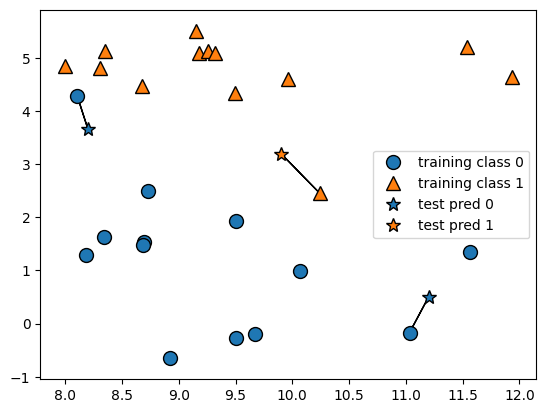

In [50]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

MULTIPLE NEIGHBORS

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent.

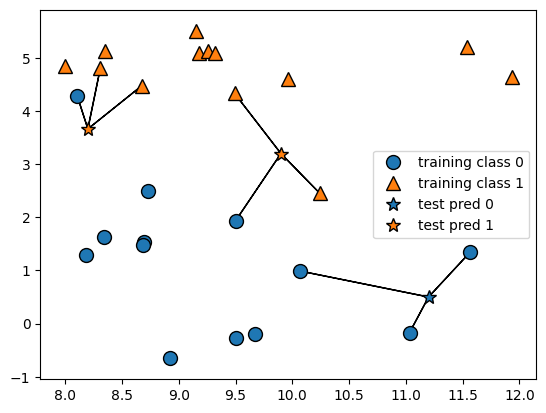

In [51]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [52]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

CONCLUSION: 1 NEIGHBOR VS. MULTIPLE NEIGHBORS

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the right side of Figure 2-1), and using many neighbors corresponds to low model complexity 

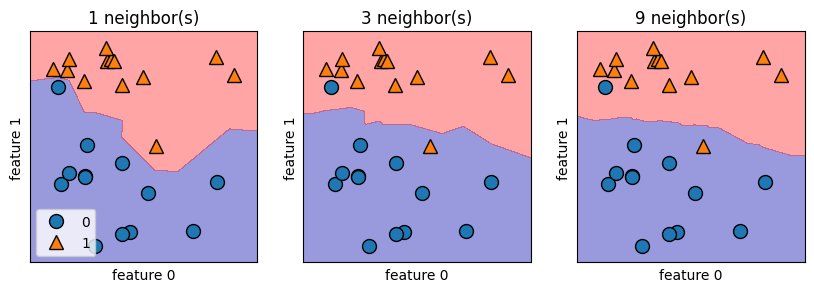

In [54]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    axes[0].legend(loc=3)

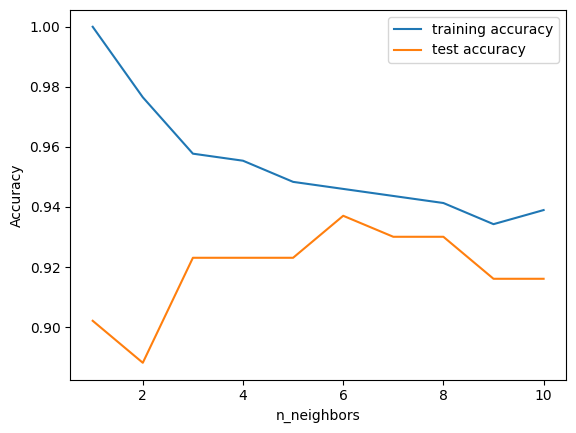

In [55]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neigh‐ bors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

2. LOGISTIC REGRESSION

Logistic regression is one of the two most common linear classification algorithms - together with Support Vector Machines. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.


/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelafricova/miniconda3/envs/polars/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


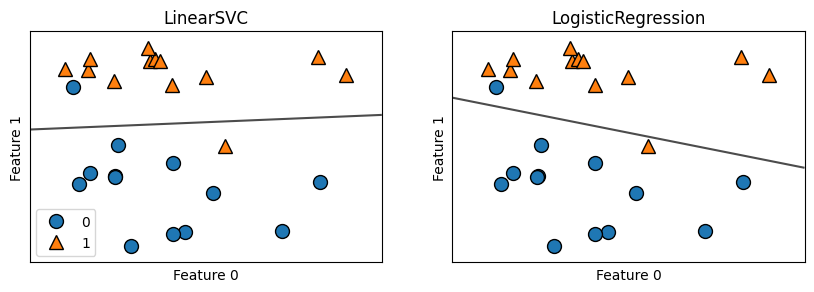

In [84]:

from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()


2ND TYPE OF SUPERVISED LEARNING = REGRESSION

For regression tasks, the goal is to predict a continuous number, or a floating-point number in programming terms (or real number in mathematical terms). Predicting a person’s annual income from their education, their age, and where they live is an example of a regression task. When predicting income, the predicted value is an amount, and can be any number in a given range. Another example of a regression task is predicting the yield of a corn farm given attributes such as previous yields, weather, and number of employees working on the farm. The yield again can be an arbitrary number.

1. STANDARD OLS LINEAR REGRESSION

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.

w[0]: 0.393906  b: -0.031804


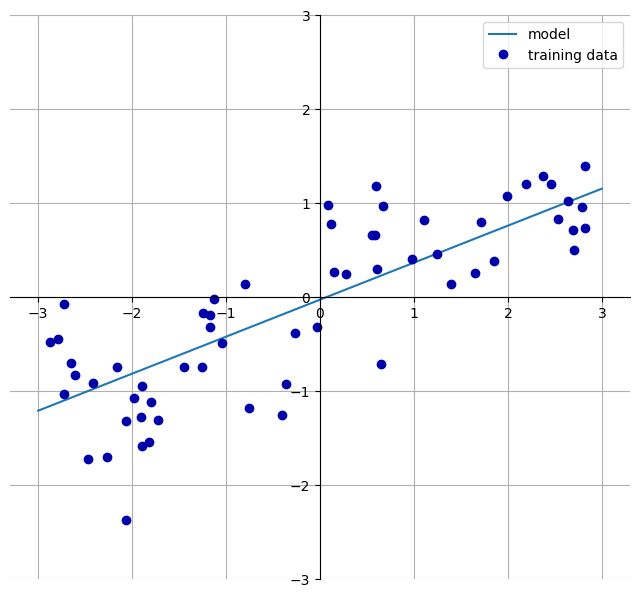

In [56]:
mglearn.plots.plot_linear_regression_wave()

In [58]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefficients, are stored in the coef_ attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [59]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [66]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


With higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. In line with this, when comparing training set and test set scores in our large Boston dataset, we find that we predict very accurately on the training set, but the R2 on the test set is much worse.

2. RIDGE REGRESSION

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called REGUARIZATION. Regularization means explicitly RESTRICTING a model TO AVOID OVERFITTING. The particular kind used by ridge regression is known as L2 regularization.

In [69]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.93
Test set score: 0.77


In [70]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


PARAMETER ALPHA

The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. In the previous example, we used the default parameter alpha=1.0. There is no reason why this will give us the best trade-off, though. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. 

DECREASING ALPHA MAKES THE COEFFICIENTS LESS RESTRICTED, UNTIL WE END UP WITH VALUES EQUIVALENT OF LINEAR REGRESSION

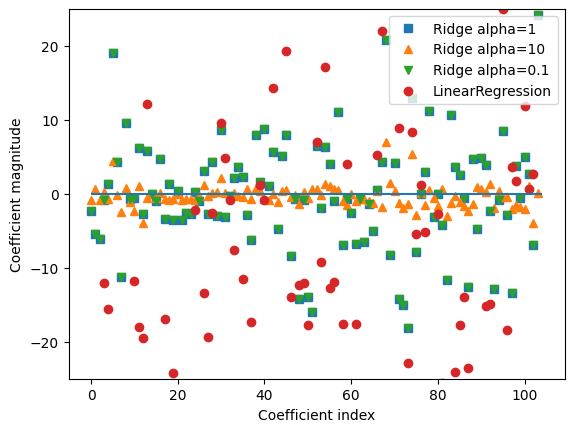

In [72]:
    plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
    plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
    plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
    plt.plot(lr.coef_, 'o', label="LinearRegression")
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.hlines(0, 0, len(lr.coef_))
    plt.ylim(-25, 25)
    plt.legend()

3. LASSO
An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization.8 The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some fea‐ tures are entirely ignored by the model. This can be seen as a form of automatic fea‐ ture selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [79]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


ALPHA, AGAIN ...

A lower alpha allowed us to fit a more complex model, which worked better on the training and test data. The performance is slightly better than using Ridge, and we are using only 33 of the 105 features. This makes this model potentially easier to under‐ stand.
If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to Linear Regression.

Text(0, 0.5, 'Coefficient magnitude')

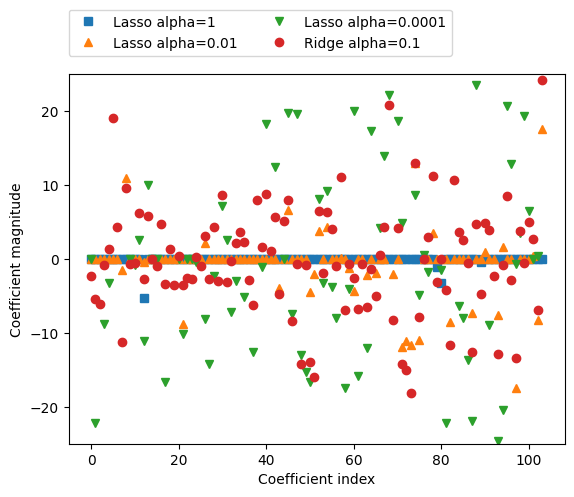

In [80]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

RIDGE VS. LASSO

Ridge regression is usually the first choice between these two models. 

However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. 

scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.